# Load/Import DataBase

In [1]:
import pandas as pd

AyuData = pd.read_csv("DataBase/AyurvedaData.csv")
AyuData.head()

,Disease,symptoms,gender,diabetic,age,prakruti,remedy type,remedies
0,psoriasis,"red to silver skin patches, skin rashes, plaqu...",M,Yes,Child,Kapha,individually,"neem,turmeric,guggul,jasmine flower"
1,psoriasis,"red to silver skin patches, skin rashes, plaqu...",M,Yes,Child,Pitta,individually,"neem,turmeric,guggul,jasmine flower"
2,psoriasis,"red to silver skin patches, skin rashes, plaqu...",M,Yes,Child,Vata,individually,"neem,turmeric,guggul,jasmine flower"
3,psoriasis,"red to silver skin patches, skin rashes, plaqu...",M,Yes,Adult,Kapha,individually,"neem,turmeric,guggul,jasmine flower"
4,psoriasis,"red to silver skin patches, skin rashes, plaqu...",M,Yes,Adult,Pitta,individually,"neem,turmeric,guggul,jasmine flower"


# Preprocessing

In [2]:
inputs = AyuData.drop(['symptoms','remedy type'],axis=1)
inputs.head()

,Disease,gender,diabetic,age,prakruti,remedies
0,psoriasis,M,Yes,Child,Kapha,"neem,turmeric,guggul,jasmine flower"
1,psoriasis,M,Yes,Child,Pitta,"neem,turmeric,guggul,jasmine flower"
2,psoriasis,M,Yes,Child,Vata,"neem,turmeric,guggul,jasmine flower"
3,psoriasis,M,Yes,Adult,Kapha,"neem,turmeric,guggul,jasmine flower"
4,psoriasis,M,Yes,Adult,Pitta,"neem,turmeric,guggul,jasmine flower"


In [3]:
Target_SIH = AyuData['remedies']
Target_SIH.head()

0    neem,turmeric,guggul,jasmine flower
1    neem,turmeric,guggul,jasmine flower
2    neem,turmeric,guggul,jasmine flower
3    neem,turmeric,guggul,jasmine flower
4    neem,turmeric,guggul,jasmine flower
Name: remedies, dtype: object

# Label Encoding

In [4]:
from sklearn.preprocessing import LabelEncoder

Dis_coder = LabelEncoder()
Dis_coder.fit( AyuData['Disease'] )
inputs['Disease_Name'] = Dis_coder.transform(AyuData['Disease'])

In [5]:
Gender_coder = LabelEncoder()
Gender_coder.fit( AyuData['gender'] )
inputs['Gender'] = Gender_coder.transform(AyuData['gender'])

In [6]:
Dia_coder = LabelEncoder()
Dia_coder.fit( AyuData['diabetic'] )
inputs['Dia'] = Dia_coder.transform(AyuData['diabetic'])

In [7]:
Pra_coder = LabelEncoder()
Pra_coder.fit( AyuData['prakruti'] )
inputs['Pra'] = Pra_coder.transform(AyuData['prakruti'])

In [8]:
Rem_coder = LabelEncoder()
Rem_coder.fit( AyuData['remedies'] )
inputs['Cure'] = Rem_coder.transform(AyuData['remedies'])

In [9]:
age_coder = LabelEncoder()
age_coder.fit( AyuData['age'] )
inputs['Age'] = age_coder.transform(AyuData['age'])

In [10]:
inputs.head()

,Disease,gender,diabetic,age,prakruti,remedies,Disease_Name,Gender,Dia,Pra,Cure,Age
0,psoriasis,M,Yes,Child,Kapha,"neem,turmeric,guggul,jasmine flower",14,1,1,0,50,1
1,psoriasis,M,Yes,Child,Pitta,"neem,turmeric,guggul,jasmine flower",14,1,1,1,50,1
2,psoriasis,M,Yes,Child,Vata,"neem,turmeric,guggul,jasmine flower",14,1,1,2,50,1
3,psoriasis,M,Yes,Adult,Kapha,"neem,turmeric,guggul,jasmine flower",14,1,1,0,50,0
4,psoriasis,M,Yes,Adult,Pitta,"neem,turmeric,guggul,jasmine flower",14,1,1,1,50,0


In [11]:

columns_to_drop = ['Disease', 'gender', 'diabetic', 'age', 'prakruti','remedies','Cure']
Target_SIH = inputs['Cure']
inputs = inputs.drop(columns=columns_to_drop)


In [12]:
inputs.head()

,Disease_Name,Gender,Dia,Pra,Age
0,14,1,1,0,1
1,14,1,1,1,1
2,14,1,1,2,1
3,14,1,1,0,0
4,14,1,1,1,0


In [13]:
Target_SIH.head()

0    50
1    50
2    50
3    50
4    50
Name: Cure, dtype: int32

# Train ML Model

In [14]:
from xgboost import XGBClassifier

Agnivesh = XGBClassifier(
    objective="multi:softmax", 
    num_classes=len(Target_SIH.unique()), 
    max_depth=None,           
    learning_rate=0.1,       
    n_estimators=50           
)





Agnivesh.fit(inputs,Target_SIH)


c:\Users\hp\anaconda3\envs\ML_Lab1\lib\site-packages\xgboost\core.py:160: UserWarning: [16:02:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "num_classes" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None, num_classes=51,
              num_parallel_tree=None, ...)

In [15]:
for i in AyuData.Disease.unique():
    print(i)

psoriasis
arthritis 
migraine
bronchitis
insomnia
Ovarian cysts
acne
cholestrol 
Fever
cough
constipation
hypertension
Rheumatoid Arthritis
eczema 
IBS


In [16]:
Agnivesh.score(inputs,Target_SIH)

0.9883177570093458

# Testing

In [17]:

#Cutom Input

Disease_name = 'acne'
user_gender = 'M'
user_age = '30'
Prakrutii = 'Pitta'
Diabetes = 'No'
    



if(int(user_age)<15):
    user_age = 'Child'
elif(int(user_age)<45):
    user_age = 'Adult'
else:
    user_age = 'Old'





new_data = pd.DataFrame({
    'Disease': [Disease_name],
    'gender': [user_gender],  
    'age': [user_age],
    'prakruti': [Prakrutii],
    'diabetic' :[Diabetes]
    
})


new_data['Disease_Name'] = Dis_coder.transform(new_data['Disease'])
new_data['Gender'] = Gender_coder.transform(new_data['gender'])
new_data['Dia'] = Dia_coder.transform(new_data['diabetic'])
new_data['Pra'] = Pra_coder.transform(new_data['prakruti']) 
new_data['Age'] = age_coder.transform(new_data['age'])


col_to_drop = ['Disease','gender','prakruti','age','diabetic']
Test_case = new_data.drop(columns=col_to_drop)

In [18]:
Prediction = Agnivesh.predict(Test_case)

In [19]:
Upchar = Rem_coder.inverse_transform(Prediction)


print('The treatment of',Disease_name,' is :',Upchar[0])

The treatment of acne  is : Sandalwood,Aloe Vera,Neem,Manjistha


# Feature Weight

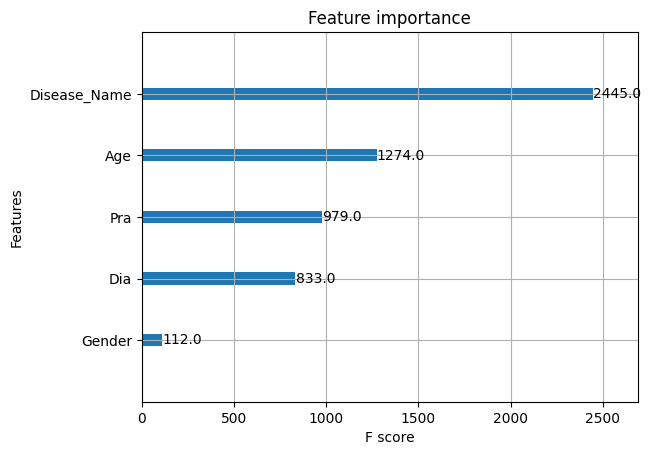

In [20]:
import matplotlib.pyplot as plt
import xgboost

xgboost.plot_importance(Agnivesh)
plt.show()

In [21]:
# TEAM

#   Team Agnivesha:
# 	Team Lead			        : Ujjwal Kulkarni
# 	Data Analyst			    : Manasi Kulkarni
# 		      			        : Nidhi Deshmukh
# 	Research and Documentation	: Rushikesh Nale
# 				    	        : Nidhi Deshmukh
# 	Design and Frontend		    : Sanskar Khedkar
	
# 	Guide				        :Prof Shahin Makubhai

